In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [4]:
# Load the dataset 
df = pd.read_csv('~/Documents/Martin/Syracuse University/IST718/IST718-master/dodgers.csv')
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


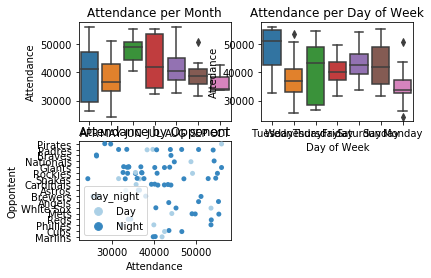

In [5]:
# Explore attendance distribution by month, day of the week, and opponent. 
plt.figure()
plt.subplot(2, 2, 1)
sns.boxplot(x='month', y='attend', data=df)
_ = plt.xlabel('Month')
_ = plt.ylabel('Attendance')
_ = plt.title('Attendance per Month')

plt.subplot(2, 2, 2)
sns.boxplot(x='day_of_week', y='attend', data=df)
_ = plt.xlabel('Day of Week')
_ = plt.ylabel('Attedance')
_ = plt.title('Attendance per Day of Week')

plt.subplot(2, 2, 3)
sns.stripplot(x='attend', y='opponent', data=df, hue='day_night', palette='Blues')
_ = plt.xlabel('Attendance')
_ = plt.ylabel('Oppontent')
_ = plt.title('Attendance by Opponent')

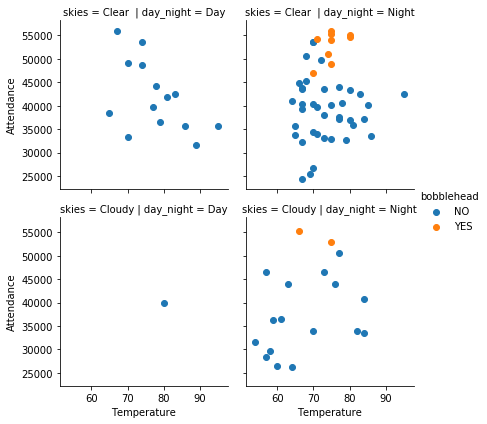

In [6]:
# Explore attendance by temperature and bobblehead promotion
g = sns.FacetGrid(df, col='day_night', row='skies', hue='bobblehead')
g = (g.map(plt.scatter, 'temp', 'attend').add_legend())
g = g.set_axis_labels('Temperature', 'Attendance')

In [7]:
# Create a new data frame keeping month, day_of_week, bobblehead, and attendance columns.
df2 = df[['month', 'day_of_week', 'bobblehead', 'attend']]

# Use LabelEncoder to convert month, day_of_week, and bobblehead to numeric values.
le = LabelEncoder()
indexCols = ['month', 'day_of_week', 'bobblehead']
for i in indexCols:
    df2.loc[:,i] = le.fit_transform(df2.loc[:,i])

# Estabilsh a random seed and split the data into train and test sets. 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(df2[['month', 'day_of_week', 'bobblehead']], df2['attend'], test_size=0.3)

# Build the linear model
lm = LinearRegression()
model = lm.fit(X_train, y_train)


/home/martin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
# Print the model results.
print('Model Score:', model.score(X_train, y_train))
print('Y-Intercept:',model.intercept_)
print(list(zip(indexCols, model.coef_)))

Model Score: 0.43335477068650347
Y-Intercept: 38885.183223889464
[('month', -31.1725057198039), ('day_of_week', -193.77441687713488), ('bobblehead', 14568.517748922892)]


The model predicts that a bobblehead event would increase attendance by 14,569 thousand fans. 

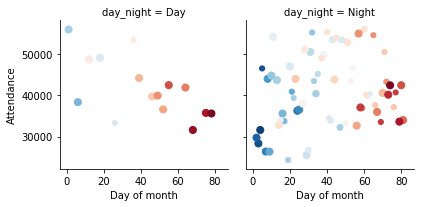

In [56]:
# Create new graph. 
# I want to see how temperature varies each day of the season and have the size of each point reflect
# whether attendance is high or low. I also want to see whether it being night or day has any effect. 
df['day_of_season'] = df.index.values+1 # I add one so that the day is not zero-indexed. 

# Creates a size array that will help better identify days with large attendance vs days with little 
# attendance
size = 50 * (df.attend/df.attend.max())

h = sns.FacetGrid(df, col='day_night', hue='temp', palette='RdBu_r')
h = (h.map(plt.scatter, 'day_of_season', 'attend', s=size))
h = h.set_axis_labels('Day of month', 'Attendance')

Evidently, as the season progresses, temperatures increase. However, cold night games at the start of  the season have lower attendances than cold games during the day. As the season progresses and temperatures increase, fans start to keep away from the ballpark, albeit this could also be due to the Dodger's season record, which ended with an 86-76 record, eight games behind the Giants, and missing the playoffs. 
It would be interesting to further split this graph by winning percentage to see whether the days when the Dodgers were over .500 featured higher attendance than days when they were under .500. 

### Try building a different model. 
In addition to the month, day of the week, and bobblehead variables, I'll include the day of the season and temperature variables in this new model. The new model will be a Random Forest regressor that will attempt to predict attendance. 

In [62]:
# Import the regressor
from sklearn.ensemble import RandomForestRegressor

# Create the new data frame so original df is not altered or lost. 
df3 = df[['month', 'day_of_week', 'day_of_season', 'temp', 'bobblehead', 'attend']]

# Parse LabelEncoder on categorical variables: month, day_of_week, bobblehead. Remaining variables are 
# numerical and don't need encoding. 
le = LabelEncoder()
indexCols = ['month', 'day_of_week', 'bobblehead']
for i in indexCols:
    df3.loc[:,i] = le.fit_transform(df3.loc[:,i])

featureCols = ['month', 'day_of_week', 'bobblehead', 'temp', 'day_of_season']
    
# Split the data once more. The seed used in the previous model will be kept to make sure that the results
# are comparable. 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(df3[featureCols], df3['attend'], test_size=0.3)

rf = RandomForestRegressor()
model2 = rf.fit(X_train, y_train)

# Prediction
prediction = rf.predict(X_test)

/home/martin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [77]:
# Results for the model 
print('Model 2 R-squared: ', model2.score(X_train, y_train))
print('Model 2 RMSE: ', np.sqrt(np.mean(np.array(y_test)-prediction)))
print('Model 2 MAE: ', np.mean(np.abs(np.array(y_test)-prediction)))
featureResults = list(zip(featureCols, rf.feature_importances_))
for i in featureResults:
    print(i)

Model 2 R-squared:  0.8913169981720943
Model 2 RMSE:  60.310198142602715
Model 2 MAE:  7896.352000000001
('month', 0.031078062264526495)
('day_of_week', 0.09152260722456733)
('bobblehead', 0.38657427807466466)
('temp', 0.1310129084327915)
('day_of_season', 0.35981214400344996)


By including temperature and day of the season, we've improved the model's R-squared value form 43.34 percent to 89.13 percent, meaning the variables to a better job of explaining the varinace in attendance.
We can also see that the model has a RMSE of 60.3, meaning that the distance from the line of best fit is small when speaking of thousands of fans in attendance. 
Finally, we can see that, of all the variables featured in the model, having a bobblehead promotion is the most important feature that drives fans to the ballpark, followed by day of the season, and temperature. It is likely, then, that the day's temperature will not affect fans attending the stadium if there is a bobblehead promotion. 